<a href="https://colab.research.google.com/github/SamuelLawrence876/Analysing-Berling-AirBnB-Rental/blob/master/German_house_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
#WordCounting
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!mkdir ~/.kaggle
#!cd ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"samuellawrence","key":"fdc2a7c542b86eef6eb0fe05cb0aec1a"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d brittabettendorf/berlin-airbnb-data

 83% 73.0M/87.7M [00:00<00:00, 76.9MB/s]
100% 87.7M/87.7M [00:00<00:00, 95.2MB/s]


In [4]:
import zipfile

zf = zipfile.ZipFile('berlin-airbnb-data.zip') 
df_calender_summary = pd.read_csv(zf.open('calendar_summary.csv'))
df_listings = pd.read_csv(zf.open('listings.csv'))
df_listings_summary = pd.read_csv(zf.open('listings_summary.csv'))
df_neighbourhoods = pd.read_csv(zf.open('neighbourhoods.csv'))
df_reviews1 = pd.read_csv(zf.open('reviews.csv'))
df_reviews_summary = pd.read_csv(zf.open('reviews_summary.csv'))

In [5]:
#DataFrame of availability / pricing of listings
df_calender_summary.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


In [6]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [7]:
df_listings_summary.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,...,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,...,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any

In [8]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
#what columns have the most unique values?
for i in df_listings_summary.columns:
    print("Column name {} and unique values are {}".format(i,len(df_listings_summary[i].unique())))

Column name id and unique values are 22552
Column name listing_url and unique values are 22552
Column name scrape_id and unique values are 1
Column name last_scraped and unique values are 2
Column name name and unique values are 21874
Column name summary and unique values are 21042
Column name space and unique values are 13599
Column name description and unique values are 21998
Column name experiences_offered and unique values are 1
Column name neighborhood_overview and unique values are 10782
Column name notes and unique values are 6688
Column name transit and unique values are 12309
Column name access and unique values are 9947
Column name interaction and unique values are 9585
Column name house_rules and unique values are 10351
Column name thumbnail_url and unique values are 1
Column name medium_url and unique values are 1
Column name picture_url and unique values are 22465
Column name xl_picture_url and unique values are 1
Column name host_id and unique values are 19180
Column name

In [10]:
#List of all catagories we're using to predict 
df2 = df_listings_summary[['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode',
                          'room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license','price']]

In [11]:
#catagorical features 
catagorical_features = df_listings_summary[['room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license','price']]

In [12]:
#continueous features
df = df_listings_summary[['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode']]

What do the graphs have to say about the catagories?

graph for room_type: total = 3


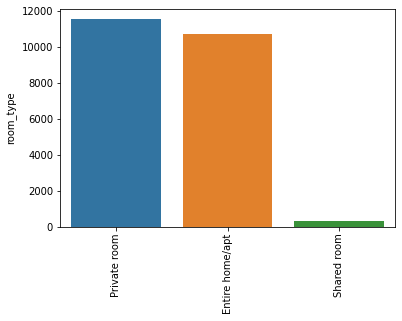

graph for bed_type: total = 5


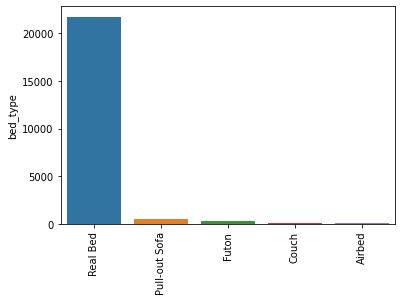

graph for review_scores_value: total = 9


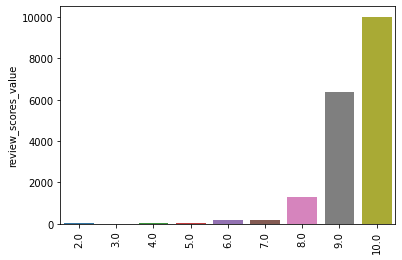

graph for instant_bookable: total = 2


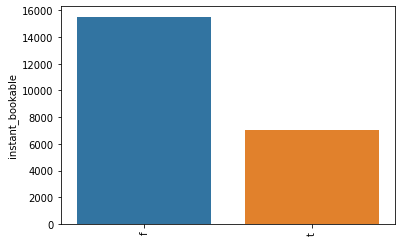

graph for host_has_profile_pic: total = 2


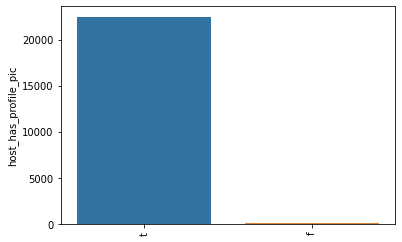

graph for requires_license: total = 2


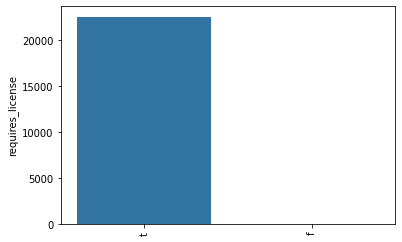

graph for price: total = 295


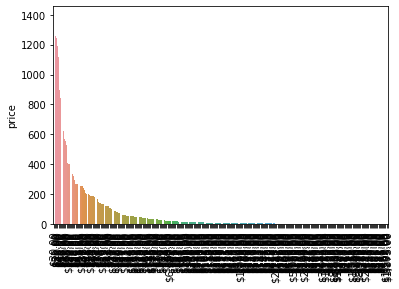

In [13]:
for Categorical_Values in catagorical_features.columns:
    cat_num = catagorical_features[Categorical_Values].value_counts()
    print('graph for %s: total = %d' % (Categorical_Values, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

## Based on our analysis we can conclude that:


*   Apparments are the predominant property type 
*   Supper hosts make up the minority of property renters
*   Mosts review range from 8 stars to 10
*   Most propertys are not instant bookable
*   Most people have just listen 1 house while some own 2 and 3 
*   Most listed propertys are not instant bookable
*   1 bedroom houses were among the most common 



What's the maxiumum/minimum cost per night?

In [14]:
catagorical_features['price'].max()

'$999.00'

In [15]:
catagorical_features['price'].min()

'$0.00'

correlation between features:

In [17]:
catagorical_features.head(1)

,room_type,bed_type,review_scores_value,instant_bookable,host_has_profile_pic,requires_license,price
0,Entire home/apt,Real Bed,9.0,f,t,t,$60.00


# Cleaning Data: 

In [18]:
catagorical_features['price'] = catagorical_features['price'].apply(lambda x: float(x.replace(',','').replace('$',''))) #Removing symbolls

Numberical representation of data types

In [19]:
catagorical_features['room_type'] = catagorical_features['room_type'].apply(lambda x: (x.replace('Entire home/apt','1').replace('Private room','2').replace('Shared room','3')))
catagorical_features['room_type'] = catagorical_features['room_type'].astype(int) 

In [20]:
catagorical_features['bed_type'] = catagorical_features['bed_type'].apply(lambda x: (x.replace('Real Bed','1').replace('Pull-out Sofa','2').replace('Futon','3')).replace('Airbed','4'))
catagorical_features['bed_type'] = catagorical_features['room_type'].astype(int)

In [21]:
catagorical_features['instant_bookable'] = catagorical_features.host_has_profile_pic.map(dict(t=1, f=0))
catagorical_features['host_has_profile_pic'] = catagorical_features.host_has_profile_pic.map(dict(t=1, f=0))
catagorical_features['requires_license'] = catagorical_features.requires_license.map(dict(t=1, f=0))

In [22]:
catagorical_features.head(1)

,room_type,bed_type,review_scores_value,instant_bookable,host_has_profile_pic,requires_license,price
0,1,1,9.0,1.0,1.0,1,60.0


# Prepocessing our data:

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [24]:
cat_features=['room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license','price']
out_feature="price"

In [25]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    catagorical_features[feature]=lbl_encoders[feature].fit_transform(catagorical_features[feature])

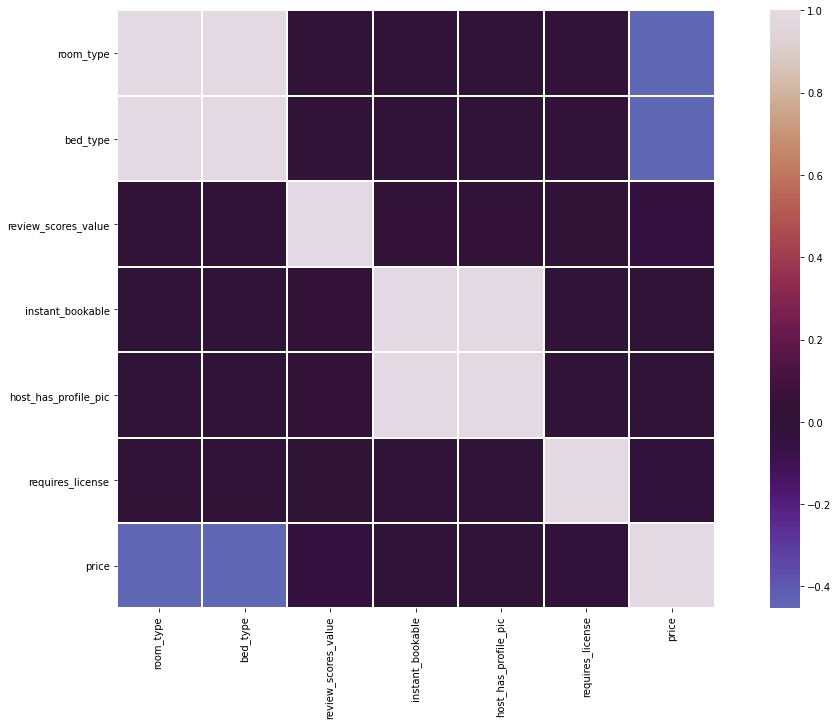

In [67]:
z, ax = plt.subplots(figsize=(20, 11))
sns.heatmap(catagorical_features.corr(), center=0,
            square=True, cmap="twilight", linewidths=1, cbar_kws={"shrink": 1})

Creating numpy array from our catagorical features:


In [28]:
cat_features = np.stack([catagorical_features['room_type'], catagorical_features['bed_type'],catagorical_features['review_scores_value'],
                          catagorical_features['instant_bookable'],catagorical_features['host_has_profile_pic'],catagorical_features['requires_license']],1)

In [29]:
cat_features

array([[   0,    0,    7,    1,    1,    1],
       [   1,    1,    8,    1,    1,    1],
       [   0,    0,    7,    1,    1,    1],
       ...,
       [   0,    0,  134,    1,    1,    1],
       [   1,    1, 1649,    1,    1,    1],
       [   1,    1, 4443,    1,    1,    1]])

Converting Catagory features into tensors: 

In [30]:
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[   0,    0,    7,    1,    1,    1],
        [   1,    1,    8,    1,    1,    1],
        [   0,    0,    7,    1,    1,    1],
        ...,
        [   0,    0,  134,    1,    1,    1],
        [   1,    1, 1649,    1,    1,    1],
        [   1,    1, 4443,    1,    1,    1]])

Create continuous variable:

In [31]:
cont_features=[]
for i in df2.columns:
    if i in ['minimum_nights','street','maximum_nights','cleaning_fee','property_type','extra_people','zipcode']:
        pass
    else:
        cont_features.append(i)

In [32]:
cont_features

['room_type',
 'bed_type',
 'review_scores_value',
 'instant_bookable',
 'host_has_profile_pic',
 'requires_license',
 'price']


Stacking continuous variable to a tensor:

In [33]:
cont_values=np.stack([catagorical_features[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[0.0000e+00, 0.0000e+00, 7.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         5.4000e+01],
        [1.0000e+00, 1.0000e+00, 8.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         1.1000e+01],
        [0.0000e+00, 0.0000e+00, 7.0000e+00,  ..., 1.0000e+00, 1.0000e+00,
         8.4000e+01],
        ...,
        [0.0000e+00, 0.0000e+00, 1.3400e+02,  ..., 1.0000e+00, 1.0000e+00,
         7.9000e+01],
        [1.0000e+00, 1.0000e+00, 1.6490e+03,  ..., 1.0000e+00, 1.0000e+00,
         9.3000e+01],
        [1.0000e+00, 1.0000e+00, 4.4430e+03,  ..., 1.0000e+00, 1.0000e+00,
         3.9000e+01]])


Dependent Feature:

In [34]:
y=torch.tensor(catagorical_features['price'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[54.],
        [11.],
        [84.],
        ...,
        [79.],
        [93.],
        [39.]])

In [35]:
catagorical_features.shape

(22552, 7)

In [36]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([22552, 6]), torch.Size([22552, 7]), torch.Size([22552, 1]))

Embedding Size For Categorical columns:

In [37]:
cat_dims = [len(catagorical_features[col].unique()) for col in ['room_type','bed_type','review_scores_value', 'instant_bookable','host_has_profile_pic', 'requires_license']]

In [38]:
cat_dims

[3, 3, 4444, 28, 28, 2]

embedding dimentions:

In [39]:
embedding_dim = [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [40]:
embedding_dim

[(3, 2), (3, 2), (4444, 50), (28, 14), (28, 14), (2, 1)]

# Model Building: 

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed representation:

In [42]:
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(3, 2)
  (1): Embedding(3, 2)
  (2): Embedding(4444, 50)
  (3): Embedding(28, 14)
  (4): Embedding(28, 14)
  (5): Embedding(2, 1)
)

In [43]:
cat_featuresz=cat_features[:6]
cat_featuresz

tensor([[0, 0, 7, 1, 1, 1],
        [1, 1, 8, 1, 1, 1],
        [0, 0, 7, 1, 1, 1],
        [1, 1, 7, 1, 1, 1],
        [1, 1, 7, 1, 1, 1],
        [0, 0, 8, 1, 1, 1]])

Creating embeded values:

In [44]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [45]:
embedding_val

[tensor([[-0.8762, -0.8815],
         [-0.8449,  0.9092],
         [-0.8762, -0.8815],
         ...,
         [-0.8762, -0.8815],
         [-0.8449,  0.9092],
         [-0.8449,  0.9092]], grad_fn=<EmbeddingBackward>),
 tensor([[ 1.7953, -0.2176],
         [-1.1431,  0.4380],
         [ 1.7953, -0.2176],
         ...,
         [ 1.7953, -0.2176],
         [-1.1431,  0.4380],
         [-1.1431,  0.4380]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.8494, -0.2749,  0.8094,  ..., -0.8962, -0.8443,  0.9040],
         [-0.7354,  1.9157, -1.9351,  ..., -0.4388,  1.0695,  0.3124],
         [ 0.8494, -0.2749,  0.8094,  ..., -0.8962, -0.8443,  0.9040],
         ...,
         [-0.5989,  0.8341, -0.5494,  ...,  0.3814, -1.4636,  1.0760],
         [-0.4228, -0.3601,  0.4971,  ...,  0.0571, -1.1912,  1.6294],
         [-0.2275, -1.8803, -0.2733,  ...,  0.7429, -1.0448,  0.2525]],
        grad_fn=<EmbeddingBackward>),
 tensor([[-0.4938,  1.5501, -1.3398,  ...,  0.4759,  0.8146,  0.4631],
         [-0

In [46]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.8762, -0.8815,  1.7953,  ..., -0.6100, -1.0016, -0.4686],
        [-0.8449,  0.9092, -1.1431,  ..., -0.6100, -1.0016, -0.4686],
        [-0.8762, -0.8815,  1.7953,  ..., -0.6100, -1.0016, -0.4686],
        ...,
        [-0.8762, -0.8815,  1.7953,  ..., -0.6100, -1.0016, -0.4686],
        [-0.8449,  0.9092, -1.1431,  ..., -0.6100, -1.0016, -0.4686],
        [-0.8449,  0.9092, -1.1431,  ..., -0.6100, -1.0016, -0.4686]],
       grad_fn=<CatBackward>)

Implement dropupout:

In [47]:
droput=nn.Dropout(.4)

In [48]:
final_embed=droput(z)
final_embed

tensor([[-1.4604, -1.4691,  2.9921,  ..., -1.0167, -1.6693, -0.7810],
        [-0.0000,  1.5153, -0.0000,  ..., -0.0000, -0.0000, -0.7810],
        [-1.4604, -1.4691,  0.0000,  ..., -0.0000, -1.6693, -0.0000],
        ...,
        [-0.0000, -1.4691,  2.9921,  ..., -0.0000, -1.6693, -0.0000],
        [-1.4082,  1.5153, -1.9051,  ..., -1.0167, -1.6693, -0.7810],
        [-1.4082,  1.5153, -1.9051,  ..., -0.0000, -1.6693, -0.7810]],
       grad_fn=<MulBackward0>)

# Create a Feed Forward Neural Network:

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [50]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [51]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

Creating test and train set:

In [52]:
batch_size=22550
test_size=int(batch_size*0.30)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

Size of our train / test data:

In [53]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(15785, 6765, 15785, 6765, 15785, 6765)

In [54]:
epochs=1200
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 63.51482391357422
Epoch number: 11 and the loss : 63.02560806274414
Epoch number: 21 and the loss : 62.43962860107422
Epoch number: 31 and the loss : 61.869998931884766
Epoch number: 41 and the loss : 61.29853057861328
Epoch number: 51 and the loss : 60.719024658203125
Epoch number: 61 and the loss : 60.10348892211914
Epoch number: 71 and the loss : 59.51629638671875
Epoch number: 81 and the loss : 58.90556716918945
Epoch number: 91 and the loss : 58.26405715942383
Epoch number: 101 and the loss : 57.70864486694336
Epoch number: 111 and the loss : 57.05754852294922
Epoch number: 121 and the loss : 56.45880126953125
Epoch number: 131 and the loss : 55.79576110839844
Epoch number: 141 and the loss : 55.043853759765625
Epoch number: 151 and the loss : 54.285118103027344
Epoch number: 161 and the loss : 53.579376220703125
Epoch number: 171 and the loss : 52.754608154296875
Epoch number: 181 and the loss : 52.03316116333008
Epoch number: 191 and the loss : 51.

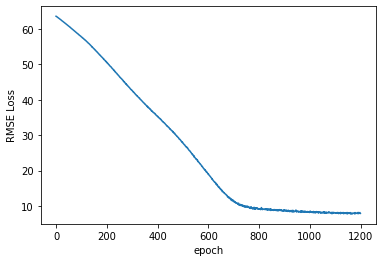

In [55]:
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

Validating the Test Data:

In [56]:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 11.607906341552734


In [57]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [58]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [66]:
model.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(3, 2)
    (2): Embedding(4444, 50)
    (3): Embedding(28, 14)
    (4): Embedding(28, 14)
    (5): Embedding(2, 1)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=90, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

Prediction VS Actual:

In [70]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,34.0,28.126596,5.873404
1,34.0,31.368219,2.631781
2,14.0,17.626841,-3.626841
3,39.0,38.404472,0.595528
4,74.0,72.307236,1.692764


# On average our model was off by:

In [68]:
final_output['Difference'].mean()

3.3627688307103103


# Saving the model

In [61]:
torch.save(model,'Kaggle_House_data.pt')

In [62]:
torch.save(model.state_dict(),'Kaggle_House_data.pt')